<a href="https://colab.research.google.com/github/sonjoy2074/Resume-Screening-NLP-Project/blob/main/ResumeScreeningModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: connect with drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df =pd.read_csv('/content/drive/MyDrive/ResumeDataset/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.shape

(962, 2)

In [6]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


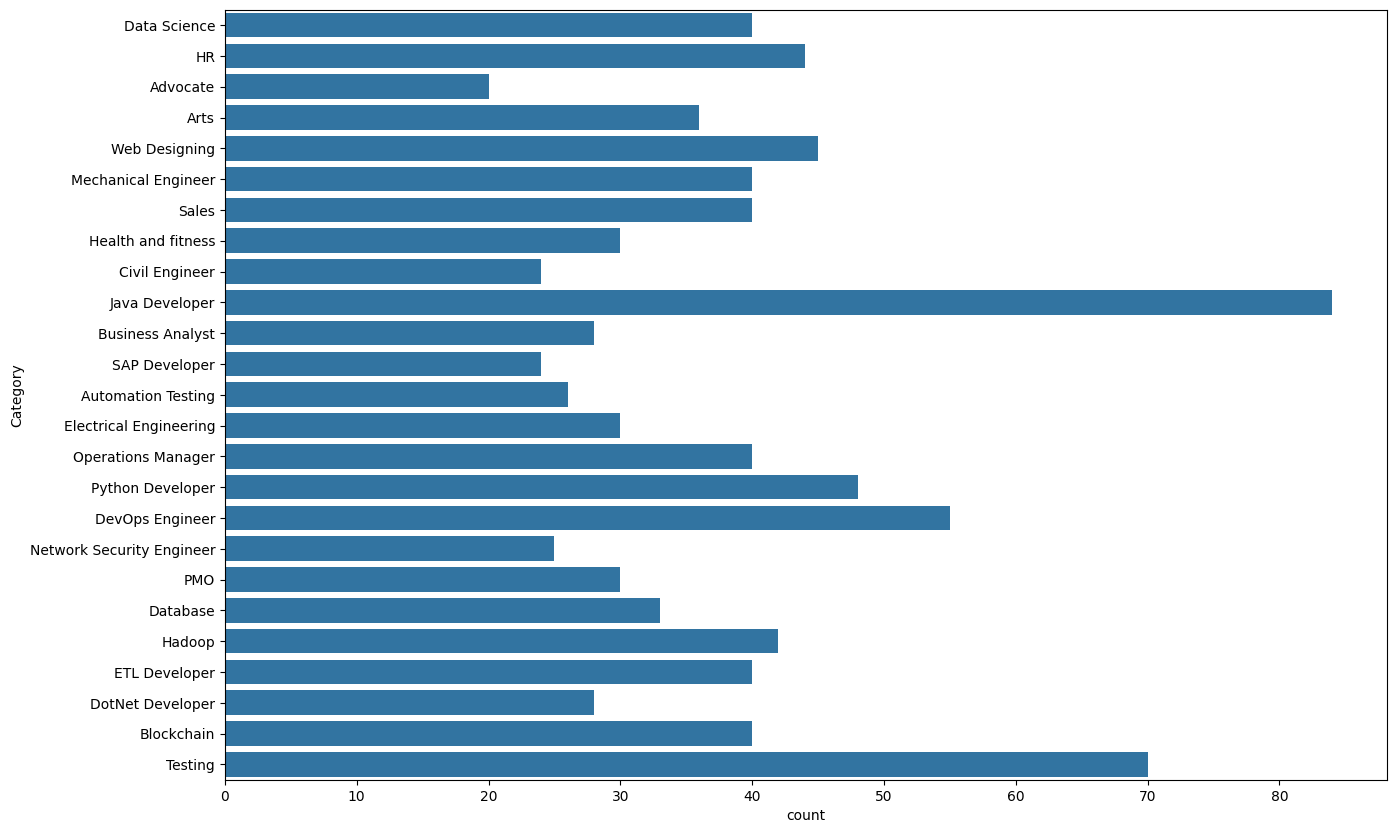

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(df['Category'])
plt.show()

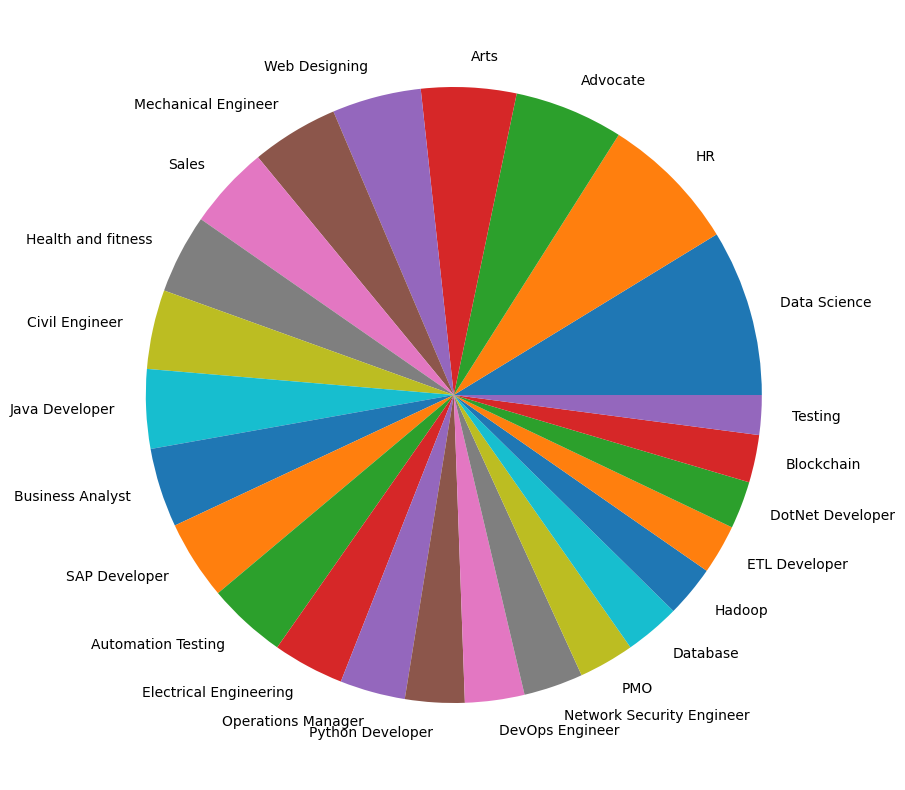

In [8]:
counts = df['Category'].value_counts()
labels =df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels)
plt.show()

**Text Cleaning**

In [9]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', ' ', text)  # Remove URLs
    text = re.sub(r'\b(RT|cc)\b', ' ', text)  # Remove 'RT' and 'cc'
    text = re.sub(r'#\S+', ' ', text)  # Remove hashtags
    text = re.sub(r'@\S+', ' ', text)  # Remove mentions
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
    text = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [10]:
print(clean_text("my website 2 ## < remove all of this @gmai. http://something"))

my website 2 remove all of this


In [11]:
df['Resume']=df['Resume'].apply(lambda x: clean_text(x))

In [12]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the

**Words into categorical values**

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [15]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to accept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [16]:
print(df['Category'].unique())

[ 6 12  0  1 24 16 22 14  5 15  4 21  2 11 18 20  8 17 19  7 13 10  9  3
 23]


**Vactorization**

In [17]:
df['Resume'] [0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words='english')

tf.fit(df['Resume'])
requredTaxt=tf.transform(df['Resume'])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(requredTaxt,df['Category'],test_size=0.2,random_state=42)

In [20]:
x_train.shape

(769, 7347)

In [21]:
x_test.shape

(193, 7347)

**Model Train**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
ypre = clf.predict(x_test)
print(accuracy_score(y_test,ypre))

0.9844559585492227


**Prediction**

In [23]:
import pickle
pickle.dump(tf,open('tf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [24]:
my_resume=""" am excited to apply for the Software Engineering Intern position at Energy Solutions. As a final year Computer Science and Engineering student at United International University (UIU), I am
eager to contribute my skills in Python, Django, PostgreSQL, and full-stack development while
learning from a team dedicated to climate-focused technology solutions.
Throughout my academic journey, I have worked on several software projects that align with the
responsibilities of this role. One notable project, Med-SecureNet, is a secure platform built with
Django for transferring brain tumor MRI scans using RSA and AES encryption. This project
highlights my ability to develop secure, performance-driven applications. Additionally, my
experience with APIs, relational databases (PostgreSQL, MySQL), and full-stack development
(React, Django, Flask) equips me to handle software challenges efficiently.
I am particularly drawn to this opportunity because of Energy Solutions’ mission to reduce carbon
emissions through market-based programs. The idea of leveraging software solutions to drive
energy efficiency resonates with me, and I am eager to apply my problem-solving mindset and
technical expertise to support the team’s initiatives.
I am available to work remotely up to 20 hours per week and would love the opportunity to discuss
how my skills align with your needs. Thank you for your time and consideration—I look forward to
the possibility of contributing to Energy Solutions."""

In [30]:
import pickle
clf = pickle.load(open('/content/clf.pkl','rb'))

clean_resume=clean_text(my_resume)
input_features=tf.transform([clean_resume])
prediction=clf.predict(input_features)[0]

category_mapping = {
    15:"Java Devloper",
    23:"Testing",
    8:"DevOps Engineer",
    20:"Python Developer",
    24:"Web Designing",
    12:"HR",
    3:"Blockchain",
    10:"ETL Developer",
    18:"Operations Manager",
    6:"Data Science",
    22:"Sales",
    12:"Big Data",
    23:"Testing",
    1:"Arts",
    7:"Database",
    11:"Electrical Engineering",
    13:"HR",
    11:"Health and fitness",
    19:"PMO",
    4:"Business Analyst",
    9:"DotNet Developer",
    2:"Automation Testing",
    21:"SAP Developer",
    16:"Machine Learning",
    17:"Network Security Engineer",
    14:"Network Engineer",
    5:"Civil Engineer",
    0:"Advocate"

}
category_name = category_mapping.get(prediction, "Unknown")
print(category_name)
print(prediction)
print(category_mapping[prediction])

Data Science
6
Data Science
